In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import xml.etree.ElementTree as ET
%matplotlib inline

In [7]:
readMe = open('positive.review','r',encoding="utf-8",errors="ignore").readlines() 
for i in range(100):
    print(readMe[i])

<review>

<unique_id>

0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"

</unique_id>

<unique_id>

1521

</unique_id>

<asin>

0375416811

</asin>

<product_name>

Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett

</product_name>

<product_type>

books

</product_type>

<product_type>

books

</product_type>

<helpful>



</helpful>

<rating>

5.0

</rating>

<title>

Founder of chick lit

</title>

<date>

August 24, 2006

</date>

<reviewer>

Erin Oakes "avid reader"

</reviewer>

<reviewer_location>

Central PA

</reviewer_location>

<review_text>

Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  



This is the book that started it all with the chick lit fever.  Bridget Jones is my hero! 

</review_text>

</review>

<review>

<unique_id>

188105201X:excellent_resource_for_principals!:onickre@mail.milwaukee.k12.wi.us

</unique_id>

<unique_id>

3294

</unique_id>

<asin>

188105201X

</

In [8]:
BooksPositRev = open('positive.review','r',encoding="utf-8",errors="ignore").readlines() 
BooksNegatRev = open('negative.review','r',encoding="utf-8",errors="ignore").readlines() 

print(BooksNegatRev.count('</review>\n'))
print(BooksPositRev.count('</review>\n'))

1000
1000


In [9]:
def Processing_XML_Reviews_Dictionnaire(ListReviews):
    count = 0
    Review = []
    Reviews = {}
    for i in range(len(ListReviews)):
        if ListReviews[i] != '</review>\n':
            if ListReviews[i] == '<review>\n' and ListReviews[i+1] == '<unique_id>\n':                
                Review.append('unique_id/'+ListReviews[i+2])
            if  ListReviews[i] == '<asin>\n':
                Review.append('asin/'+ListReviews[i+1])    
            if  ListReviews[i] == '<product_name>\n':
                Review.append('product_name/'+ListReviews[i+1])
            if ListReviews[i] == '<helpful>\n':
                Review.append('helpful/'+ListReviews[i+1])
            if ListReviews[i] == '<rating>\n':
                Review.append('rating/'+ListReviews[i+1])
            if ListReviews[i] == '<title>\n':
                Review.append('title/'+ListReviews[i+1])
            if ListReviews[i] == '<date>\n':
                Review.append('date/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer>\n':
                Review.append('reviewer/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer_location>\n':
                Review.append('reviewer_location/'+ListReviews[i+1])
            if ListReviews[i] == '<review_text>\n':
                Review.append('review_text/'+ListReviews[i+1])
        elif ListReviews[i] == '</review>\n':
            count = count + 1
            r = 'review'+ str(count) 
            Reviews[r] = Review
            
            Review = []
    return Reviews



In [10]:
NegRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksNegatRev)
posRev_Dict = Processing_XML_Reviews_Dictionnaire(BooksPositRev)
posRev_Dict['review1']

['unique_id/0375416811:founder_of_chick_lit:erin_oakes_"avid_reader"\n',
 'asin/0375416811\n',
 'product_name/Bridget Jones Diary: Books: Helen Fielding,Tracie Bennett\n',
 'helpful/\n',
 'rating/5.0\n',
 'title/Founder of chick lit\n',
 'date/August 24, 2006\n',
 'reviewer/Erin Oakes "avid reader"\n',
 'reviewer_location/Central PA\n',
 "review_text/Bridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  \n"]

In [11]:
print(len(NegRev_Dict))
print(len(posRev_Dict))
NegRev_Dict['review852']



1000
1000


['unique_id/0134744799:useful_but_over_priced:"tseant"\n',
 'asin/0134744799\n',
 'product_name/International Accounting Second Edition: Books\n',
 'helpful/6 of 8\n',
 'rating/1.0\n',
 'title/Useful but over priced\n',
 'date/February 4, 2001\n',
 'reviewer/"tseant"\n',
 'reviewer_location/Tokyo, Japan (formerly Sydney, Australia\n',
 'review_text/A useful book that provides a good summary comparing differing Accounting Standards and approaches between countries.  However, it is not worth the price.  It is supposedly written for later year undergraduate and masters accounting students.  It is more suitable for general second year accounting students.  Plus, as I am working with a multinational European bank in Japan, the book is, rapidly becoming, out of date.  There is none of the simply but incisive commentary which can be found in other books about the differences and outcomes of general accounting principals drawn from different countries\n']

In [12]:
def Porcessing_Dictonnary_ToDataFrame(Dict):
    df = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
    count = 0
    for i,k in Dict.items():
        df.loc[count] = [k[0].split("/")[1].split("\n")[0],k[1].split("/")[1].split("\n")[0]
                              ,k[2].split("/")[1].split("\n")[0],k[3].split("/")[1].split("\n")[0]
                              ,k[4].split("/")[1].split("\n")[0],k[5].split("/")[1].split("\n")[0]
                              ,k[6].split("/")[1].split("\n")[0],k[7].split("/")[1].split("\n")[0]
                              ,k[8].split("/")[1].split("\n")[0],k[9].split("/")[1].split("\n")[0]
        ]
        count = count + 1

    return df

In [13]:
BooksNeg = Porcessing_Dictonnary_ToDataFrame(NegRev_Dict)
BooksPos = Porcessing_Dictonnary_ToDataFrame(posRev_Dict)

In [14]:
BooksNeg.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,0743518144:ok~_but_i_think_the_keirsey_temperm...,0743518144,"Now, Discover Your Strengths: Books: Marcus Bu...",7 of 8,2.0,Ok~ but I think the Keirsey Temperment Test is...,"September 10, 2006","Jen ""the truthsayer""","DE, USA","This book has its good points. If anything, it..."
1,0895261715:repellent_sale_of_conservativism:e....,0895261715,The Conservative Mind: From Burke to Eliot: Bo...,32 of 95,2.0,Repellent Sale of Conservativism,"August 18, 2005",E. David Swan,"South Euclid, Ohio USA",The fatalistic view of Conservativism is expre...


In [15]:
BooksPos.head(n=2)

,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
0,"0375416811:founder_of_chick_lit:erin_oakes_""av...",0375416811,"Bridget Jones Diary: Books: Helen Fielding,Tra...",,5.0,Founder of chick lit,"August 24, 2006","Erin Oakes ""avid reader""",Central PA,"Bridget Jones, modern day woman, brillant and ..."
1,188105201X:excellent_resource_for_principals!:...,188105201X,Leadership and the New Science: Learning About...,3 of 3,5.0,Excellent resource for principals!,"July 6, 1999",ONICKRE@mail.milwaukee.k12.wi.us,"Milwaukee, Wisconsin",I am ordering copies for all 23 middle school ...


In [16]:
import os
indir = '/Users/abhayanandtripathi/Desktop/sorted_data/'
PositifReviews = []
NegativeReviews = []
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        if f == "positive.review":
            log = open(os.path.join(root, f), 'r',encoding="utf-8",errors="ignore").readlines()
            PositifReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            print(os.path.join(root, f))
        if f == "negative.review":
            log = open(os.path.join(root, f), 'r',encoding="utf-8",errors="ignore").readlines()
            NegativeReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            print(os.path.join(root, f))



/Users/abhayanandtripathi/Desktop/sorted_data/music/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/music/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/video/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/video/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/health_&_personal_care/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/health_&_personal_care/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/jewelry_&_watches/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/jewelry_&_watches/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/magazines/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/magazines/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/electronics/negative.review
/Users/abhayanandtripathi/Desktop/sorted_data/electronics/positive.review
/Users/abhayanandtripathi/Desktop/sorted_data/camera_&_photo/negative.review
/Users/abhayanandtripathi/Des

In [17]:
print(len(PositifReviews))
print(len(NegativeReviews))
print(len(PositifReviews[1]))
print(len(PositifReviews[2]))

24
24
1000
1000


In [18]:
df_24_Postif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df_24_Negatif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df = pd.DataFrame()

for Rev in PositifReviews:
    print(Rev['review1'])
    df = Porcessing_Dictonnary_ToDataFrame(Rev)
    df_24_Postif = pd.concat([df_24_Postif, df])
    df.empty

['unique_id/B00008QS9V:it\'s_a_mighty_wind_a_blowin\'!:carla_j._dinsmore_"acoustic_music_junkie"\n', 'asin/B00008QS9V\n', 'product_name/A Mighty Wind: The Album: Music: Various Artists\n', 'helpful/\n', 'rating/5.0\n', "title/It's a Mighty Wind a blowin'!\n", 'date/July 5, 2006\n', 'reviewer/Carla J. Dinsmore "Acoustic music junkie"\n', 'reviewer_location/Wilmington, DE USA\n', "review_text/This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs. I was amazed at the fantastic harmonies and musical arrangements.\n"]
['unique_id/6301968972:just_as_true_today!:gary_d._thomas_"brass_crass"\n', 'asin/6301968972\n', 'product_name/Hucksters: Video: Clark Gable,Deborah Kerr,Sydney Greenstreet,Adolphe Menjou,Ava Gardner,Keenan Wynn,Edward Arnold,Aubrey Mather,Richard Gaines,Frank Albertson,Douglas Fowley,Clinton Sundberg,Gloria Holden,Connie Gilchrist,Kathryn Card,Lillian Bronson,Vera Marshe,Ralph Bunker,Virginia Dale,Jimmy Conlin,Jack Conway\n', 'help

In [19]:
df1 = pd.DataFrame()
for Rev in NegativeReviews:
    df1 = Porcessing_Dictonnary_ToDataFrame(Rev)
    df_24_Negatif = pd.concat([df_24_Negatif, df1])
    df1.empty

In [20]:
print(len(df_24_Postif))
print(len(df_24_Negatif))
df_24_Postif.describe()
df_24_Negatif.describe()

20972
15676


,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
count,15676,15676,15676,15676,15676,15676,15676,15676,15676,15676
unique,14564,10517,10373,900,2,12628,1637,12648,5462,13784
top,B00005OLX1:sucks_sucks:jason,B00099QAQK,TIME [6-month subscription] [with $5 Bonus]: M...,,1.0,Disappointed,"January 9, 2007",,,
freq,4,18,20,2542,9890,72,208,422,3389,61


In [21]:
df_24_Postif['Class'] = "pos" 
df_24_Negatif['Class'] = "neg" 
Reviews  = pd.concat([df_24_Postif,df_24_Negatif])
Reviews.drop('unique_id',axis=1,inplace=True)

In [22]:
BooksPos.drop('unique_id',axis=1,inplace=True)
BooksNeg.drop('unique_id',axis=1,inplace=True)

In [23]:
BooksPos['Class'] = "pos" 
BooksNeg['Class'] = "neg" 
BooksReviews = pd.concat([BooksPos,BooksNeg])

In [24]:
Reviews.head(n=2)

,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text,Class
0,B00008QS9V,A Mighty Wind: The Album: Music: Various Artists,,5.0,It's a Mighty Wind a blowin'!,"July 5, 2006","Carla J. Dinsmore ""Acoustic music junkie""","Wilmington, DE USA","This is a wonderful album, that evokes memorie...",pos
1,B00005JJ04,Sometime Tuesday Morning: Music: Johnny A.,4 of 4,5.0,Sometime Tuesday Morning defies description,"May 3, 2005",Tim Withee,"Auburn, WA United States","On one hand, this CD is a straight ahead instr...",pos


In [25]:
Reviews.iloc[0,8]

"This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs. I was amazed at the fantastic harmonies and musical arrangements."

In [27]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer



def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(Reviews.iloc[0,8])
print("Words ",Words)
print("Sents ",Sents)

Words  ['This', 'is', 'a', 'wonderful', 'album', ',', 'that', 'evokes', 'memories', 'of', 'the', '60', "'s", 'folk', 'boom', ',', 'yet', 'contains', 'original', 'songs', '.', 'I', 'was', 'amazed', 'at', 'the', 'fantastic', 'harmonies', 'and', 'musical', 'arrangements', '.']
Sents  ["This is a wonderful album, that evokes memories of the 60's folk boom, yet contains original songs.", 'I was amazed at the fantastic harmonies and musical arrangements.']


In [29]:
from nltk.corpus import stopwords
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{"should've", "shouldn't", "weren't", 'don', 'herself', 'd', "hasn't", "shan't", 'him', 'until', 'was', 'does', 'doesn', 'm', 'then', 'mightn', 'other', 'theirs', 'you', "mightn't", 'at', 'i', "you'll", 'again', 'these', 'to', 'all', "hadn't", "it's", 'there', 'not', 'doing', 'being', 'had', 'what', "you're", 'yours', 'ourselves', 'y', "mustn't", 'should', 'as', 'wouldn', 'she', 'our', "couldn't", 'shouldn', 'ours', 'down', "don't", 'with', "needn't", 'yourselves', "wouldn't", "you'd", 'hers', 'weren', 's', "haven't", 'themselves', 'whom', 'be', 'under', 'didn', 'against', 'are', 'can', 'who', 'any', 'each', 'very', 'yourself', 'a', 're', 'wasn', 'once', 'nor', 'won', 'this', 'and', 'ain', 'some', 'about', 'further', 'itself', 'off', "wasn't", 'll', 'here', 'which', "you've", 'their', "she's", 'most', 'did', 'during', 'below', 'between', "didn't", 'them', 'we', 'needn', 'haven', 'shan', 'of', 'over', 't', 'through', 'that', 'his', 'above', 'few', 'than', 'ma', 'too', 'mustn', "isn't", 

In [31]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print(Stemmed_Words)

['thi', 'wonder', 'album', ',', 'evok', 'memori', '60', "'s", 'folk', 'boom', ',', 'yet', 'contain', 'origin', 'song', '.', 'I', 'amaz', 'fantast', 'harmoni', 'music', 'arrang', '.']


In [33]:
from nltk.stem import WordNetLemmatizer
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print(Lemmatized_Words)

['This', 'wonderful', 'album', ',', 'evokes', 'memory', '60', "'s", 'folk', 'boom', ',', 'yet', 'contains', 'original', 'song', '.', 'I', 'amazed', 'fantastic', 'harmony', 'musical', 'arrangement', '.']


In [34]:
ListWords =  [RegExpTokenizer(m) for m in list(Reviews['review_text'])]
print(ListWords[1])
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])


['On', 'one', 'hand', 'this', 'CD', 'is', 'a', 'straight', 'ahead', 'instrumental', 'rocker', 'but', 'Johnny', 'A', 'really', 'shows', 'how', 'great', 'he', 'is', 'with', 'ballads', 'such', 'as', 'his', 'covers', 'of', 'Wichita', 'Lineman', 'and', 'Yes', 'it', 'Is', 'In', 'fact', 'those', 'two', 'ballads', 'alone', 'are', 'worth', 'the', 'price', 'of', 'the', 'CD', 'by', 'themselves']
['On', 'one', 'hand', 'CD', 'straight', 'ahead', 'instrumental', 'rocker', 'Johnny', 'A', 'really', 'shows', 'great', 'ballads', 'covers', 'Wichita', 'Lineman', 'Yes', 'Is', 'In', 'fact', 'two', 'ballads', 'alone', 'worth', 'price', 'CD']
['On', 'one', 'hand', 'CD', 'straight', 'ahead', 'instrumental', 'rocker', 'Johnny', 'A', 'really', 'show', 'great', 'ballad', 'cover', 'Wichita', 'Lineman', 'Yes', 'Is', 'In', 'fact', 'two', 'ballad', 'alone', 'worth', 'price', 'CD']


In [35]:
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    return all_words

In [59]:
print(type(all_words),all_words)

<class 'nltk.probability.FreqDist'> <FreqDist with 46670 samples and 1056696 outcomes>


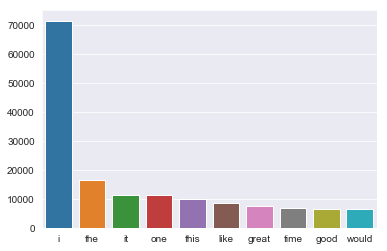

In [37]:
import seaborn as sns
from sklearn.manifold import TSNE
all_words = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [38]:
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
    return ListWords
def eliminate_irrelevent_Word(Word):
    Word = RegExpTokenizer(Word)
    Word = [item.lower() for item in Word]
    for m in Word:
        if len(m) <=3:
            Word.remove(m)
        if m == 'this':
            Word.remove(m)
    return Word

All Words length  46670


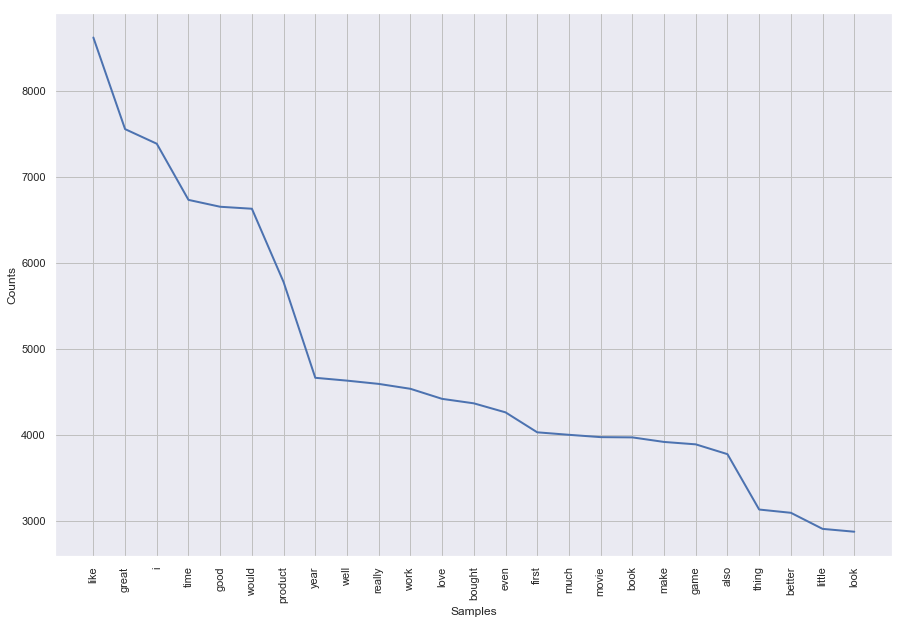

In [39]:
ListWords = eliminate_irrelevent_Words(ListWords)
all_words = Bag_Of_Words(ListWords)
print("All Words length ",len(all_words))
%matplotlib inline
sns.set()
ax = plt.figure(figsize=(15,10))
freqdist1 = FreqDist(all_words)
freqdist1.plot(25)

In [40]:
import random
def Create_Document(Reviews,ListWords):
    ListClass = list(Reviews['Class'])
    Documents =  []
    for m in range(len(ListWords)):
        Documents.append((ListWords[m],ListClass[m]))
    print(Documents[0])
    random.shuffle(Documents)
    return Documents
Documents = Create_Document(Reviews,ListWords)


(['wonderful', 'album', 'evokes', 'memory', 'folk', 'boom', 'contains', 'original', 'song', 'amazed', 'fantastic', 'harmony', 'musical', 'arrangement'], 'pos')


In [41]:
def find_features(document,all_words,nbr_word):
    Most_Comm_Word = []    
    for w in all_words.most_common(nbr_word):
        Most_Comm_Word.append(w[0])

    word_features = Most_Comm_Word
    words = RegExpTokenizer(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
print(find_features('im road going to tunisia .',all_words,100))

{'like': False, 'great': False, 'i': False, 'time': False, 'good': False, 'would': False, 'product': False, 'year': False, 'well': False, 'really': False, 'work': False, 'love': False, 'bought': False, 'even': False, 'first': False, 'much': False, 'movie': False, 'book': False, 'make': False, 'game': False, 'also': False, 'thing': False, 'better': False, 'little': False, 'look': False, 'best': False, 'back': False, 'used': False, 'could': False, 'they': False, 'magazine': False, 'still': False, 'price': False, 'camera': False, 'never': False, 'many': False, 'quality': False, 'made': False, 'think': False, 'know': False, 'read': False, 'problem': False, 'want': False, 'easy': False, 'find': False, 'film': False, 'take': False, 'review': False, 'one': False, 'money': False, 'month': False, 'people': False, 'need': False, 'amazon': False, 'nice': False, 'come': False, 'ever': False, 'item': False, 'found': False, 'every': False, 'watch': False, 'play': False, 'give': False, 'using': False

In [42]:
import pickle
def Pickle_Save_Classifer(classifier,Test_Set):
    Classifier_o = open('NaiveBayes Score Model :'+str(nltk.classify.accuracy(classifier, Test_Set)*100)+'.pickle','wb')
    classifier = pickle.load(Classifier_o)
    Classifier_o.close()
    return classifier

In [43]:
def Pickle_open_Classifer(path):
    SaveClassifier = open(path,'rb')
    pickle.dump(classifier,SaveClassifier)
    SaveClassifier.close()

In [44]:
def Features_Set(all_words,Documents,nbr_word):
    featuresets = []
    for rev,cat in Documents:
        feature = find_features(' '.join(rev),all_words,nbr_word)
        featuresets.append((feature,cat))
    return featuresets

In [46]:
featuresets = Features_Set(all_words,Documents,100)

In [47]:
from sklearn.model_selection import train_test_split
Train_Set, Test_Set = train_test_split(featuresets, test_size=0.33, random_state=42)
print(Train_Set[26])

({'like': False, 'great': False, 'i': False, 'time': False, 'good': False, 'would': False, 'product': False, 'year': False, 'well': False, 'really': False, 'work': False, 'love': False, 'bought': False, 'even': False, 'first': False, 'much': True, 'movie': False, 'book': False, 'make': False, 'game': False, 'also': False, 'thing': False, 'better': False, 'little': False, 'look': False, 'best': False, 'back': False, 'used': False, 'could': False, 'they': False, 'magazine': False, 'still': False, 'price': False, 'camera': False, 'never': False, 'many': False, 'quality': False, 'made': False, 'think': False, 'know': False, 'read': False, 'problem': False, 'want': False, 'easy': False, 'find': False, 'film': False, 'take': False, 'review': False, 'one': False, 'money': False, 'month': False, 'people': False, 'need': False, 'amazon': False, 'nice': False, 'come': False, 'ever': False, 'item': False, 'found': False, 'every': False, 'watch': False, 'play': False, 'give': False, 'using': False

In [48]:
with open("FeaturesSet100Words.pql", "wb") as fp:   
    pickle.dump(featuresets, fp)

Reviews.to_csv("Reviews.csv", sep='\t', encoding='utf-8')


** pickle works fine **

In [49]:
with open("FeaturesSet100Words.pql", "rb") as fp:  
    b = pickle.load(fp)
print(b[1])

({'like': False, 'great': False, 'i': False, 'time': False, 'good': False, 'would': False, 'product': False, 'year': False, 'well': True, 'really': False, 'work': False, 'love': False, 'bought': False, 'even': False, 'first': False, 'much': False, 'movie': False, 'book': False, 'make': False, 'game': False, 'also': False, 'thing': False, 'better': False, 'little': False, 'look': False, 'best': False, 'back': False, 'used': False, 'could': False, 'they': False, 'magazine': False, 'still': False, 'price': False, 'camera': False, 'never': False, 'many': False, 'quality': False, 'made': False, 'think': False, 'know': False, 'read': False, 'problem': False, 'want': False, 'easy': False, 'find': False, 'film': False, 'take': False, 'review': True, 'one': False, 'money': False, 'month': False, 'people': False, 'need': False, 'amazon': False, 'nice': False, 'come': False, 'ever': False, 'item': False, 'found': False, 'every': False, 'watch': True, 'play': False, 'give': False, 'using': False, 

In [50]:
from sklearn.model_selection import train_test_split
def model_Books():    
    ListWords =  [RegExpTokenizer(m) for m in list(BooksReviews['review_text'])]
    print(ListWords[1])
    ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
    print(ListWords[1])
    ListWords = [Lemmatizing_Words(m) for m in ListWords]
    print(ListWords[1])



    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
                
    AllWordsBooks = Bag_Of_Words(ListWords)
    len(AllWordsBooks)
    Documents = Create_Document(BooksReviews,ListWords)
    featuresets = Features_Set(all_words,Documents,3000)
    Train_Set, Test_Set = train_test_split(
        featuresets, test_size=0.33, random_state=42)
    return Train_Set,Test_Set

In [51]:
Train_Set, Test_Set = model_Books()
len(Train_set)

['I', 'am', 'ordering', 'copies', 'for', 'all', '23', 'middle', 'school', 'principals', 'and', 'the', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'school', 'programs', 'in', 'the', 'Milwaukee', 'Public', 'Schools', 'system', 'We', 'will', 'use', 'Wheatley', 's', 'book', 'as', 'the', 'primary', 'resource', 'for', 'our', 'professional', 'growth', 'at', 'our', 'MPS', 'Middle', 'School', 'Principals', 'Collaborative', 'institute', 'August', '9', '11', '1999', 'We', 'are', 'not', 'just', 'concerned', 'with', 'reform', 'we', 'seek', 'renewal', 'as', 'well', 'Wheatley', 'provides', 'the', 'basis', 'She', 'notes', 'that', 'Einstein', 'said', 'that', 'a', 'problem', 'cannot', 'be', 'solved', 'from', 'the', 'same', 'consciousness', 'that', 'created', 'it', 'The', 'entire', 'book', 'is', 'a', 'marvelous', 'exploration', 'of', 'this', 'philosophy']
['I', 'ordering', 'copies', '23', 'middle', 'school', 'principals', 'two', 'assistant', 'principals', 'leading', 'two', 'middle', 'sc

1340

In [60]:
print(Train_Set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

def NaiveBayes_Model(Train_Set,Test_Set):
    classifier = NaiveBayesClassifier.train(Train_Set) 
    Important10 = classifier.show_most_informative_features(10)
    accuracy = nltk.classify.accuracy(classifier, Test_Set)*100
    return classifier,Important10,accuracy

In [64]:
classifier,Important10,accuracy = NaiveBayes_Model(Train_Set,Test_Set)
print(Important10)
print("Classifier accuracy percent:",accuracy)


Most Informative Features
                  hoping = True              neg : pos    =     13.4 : 1.0
                  boring = True              neg : pos    =     12.2 : 1.0
          disappointment = True              neg : pos    =     11.3 : 1.0
                  social = True              pos : neg    =      9.4 : 1.0
                   fails = True              neg : pos    =      7.9 : 1.0
                  unless = True              neg : pos    =      7.2 : 1.0
           unfortunately = True              neg : pos    =      7.0 : 1.0
                   bible = True              pos : neg    =      6.8 : 1.0
                  unique = True              pos : neg    =      6.8 : 1.0
                  finish = True              neg : pos    =      6.8 : 1.0
None
Classifier accuracy percent: 75.75757575757575


In [54]:
def Word_Prep(Sent):
    Words =  RegExpTokenizer(test_sentence)
    Words =  Eliminate_Stop_Word(Words)
    Words = Lemmatizing_Words(Words)
    print(Words)
    Words = eliminate_irrelevent_Word(' '.join(Words))
    return ' '.join(Words)
    

In [55]:
test_sentence = "This is the best band I've ever heard!"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'best', 'band', 'I', 'ever', 'heard']


'pos'

In [56]:
test_sentence = "This is a readable book"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['This', 'readable', 'book']


'pos'

In [57]:
test_sentence = "i think that this book is very disappointing"
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['think', 'book', 'disappointing']


'neg'

In [58]:
test_sentence = "If you sometimes like to go to the movies to have fun, Wasabi is a good place to start."
test_sent_features = find_features(Word_Prep(test_sentence),all_words,3000)
classifier.classify(test_sent_features)

['If', 'sometimes', 'like', 'go', 'movie', 'fun', 'Wasabi', 'good', 'place', 'start']


'pos'